In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [1]:
#%cd /content/gdrive/0_Desarrollo_Tesis/2.Resultados_Preprocesamiento/
%cd /content/gdrive/My\ Drive/0_Desarrollo_Tesis/2.Resultados_Preprocesamiento/
#print (os.path.abspath("."))

[Errno 2] No such file or directory: '/content/gdrive/My Drive/0_Desarrollo_Tesis/2.Resultados_Preprocesamiento/'
/content


In [ ]:
 # Import matplotlib library 
import matplotlib.pyplot as plt 
import numpy.linalg as linalg 
import numpy as np 
import cv2
import os

In [ ]:
path_redimensionadas='00_Dataset_Cortadas_Redimensionadas_perros' #4
path_resultado='00_EIGEN_PRUEBA' #4

#Array para apilar las imagenes
files = [] #nombre de las imagenes
path_files = [] #nombre de las carpetas por cantidad de imagenes
path_database = [] #contiene la ruta de cada imagen
array_imagenes =[] #matrices que representan cada imagen
#####---------------------------
#For que recorre las carpetas(sujetos) del path
contador = 0
for aa in os.listdir(path_redimensionadas):
  print("carpeta", aa)
  #For que recorre la imagen de cada carpeta(sujeto)
  for f in os.listdir(path_redimensionadas + '/' + aa):
    contador = contador + 1
    print("nombre imagen", f)
    #aa Carpeta del sujeto 
    #f Nombre de la imagen del sujeto
    #Ruta de la imagen
    imgPath = path_redimensionadas + '/' + aa + '/' + f
    files.append(f)
    path_files.append(aa)
    path_database.append(imgPath)


    #Abrir Imagen (Lee la imagen en formtado BGR)
    imgBGR = cv2.imread(imgPath)
    dim = (180, 180)
    #Se redimensiona la imagen de 180 por 180
    resizedBGR = cv2.resize(imgBGR, dim, interpolation = cv2.INTER_AREA) 

    #Se obtiene la información de las imagenes 
    height, width, channels = resizedBGR.shape

    #Convierte la imagen en RGB
    imgRGB = cv2.cvtColor(resizedBGR, cv2.COLOR_BGR2RGB)
    
    #Copiar imagen del formato RGB para luego convertirla en GRAY
    gray_image = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)

    #Convertir de Matriz a Vector
    flat_arr = gray_image.ravel()
    #Convertir el vector a un array
    vector = np.array(flat_arr)
    #Se apila a el array
    array_imagenes.append(vector)


# Se tiene una matriz de todas las imagenes
matriz_imagenes=np.matrix(array_imagenes)

#Matriz Promedio (Saca el promedio de todas las imagenes)
matrix_avg = np.sum(matriz_imagenes,axis=0)/len(matriz_imagenes)

#Matriz_imagenes - Matriz Promedio
vec = matriz_imagenes - matrix_avg

#--------------------------
#Impresion de la matriz o cara promedio
print("Cara Promedio")
faceAverage = np.reshape(matrix_avg, (180, 180))
plt.figure(figsize=(4, 4))
plt.imshow(faceAverage,cmap='Greys')
plt.title("Mean Face")
#--------------------------


A = np.matrix(vec)
#print(A)

#Matriz de Covarianza Reducida
cov = A*np.transpose(A)


#--------------------------
#Se extraen los eigenValores y eigenVectores
eigenValues, eigenVectors = linalg.eig(cov) 
idx = eigenValues.argsort()[::-1] 
eigenValues = eigenValues[idx] 
eigenVectors = eigenVectors[:,idx] 
#-------------------------
#print(eigenVectors[0].shape)
#print(vec.shape)

#--------------------------
#Componentes principales (Son los k con mayor caracteristicas de todas las imagenes)
'''k=20
for i in range(k):
  projection1 = eigenVectors[i]*vec
  eigenface = np.reshape(projection1, (180, 180))
  plt.figure(figsize=(4, 4))
  plt.imshow(eigenface,cmap='Greys')
  plt.title("Eigen Face Dog " +str(i))'''

#####---------------------------

NameError: ignored

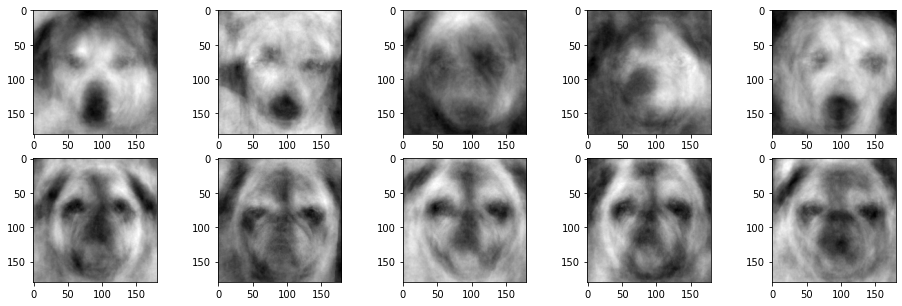

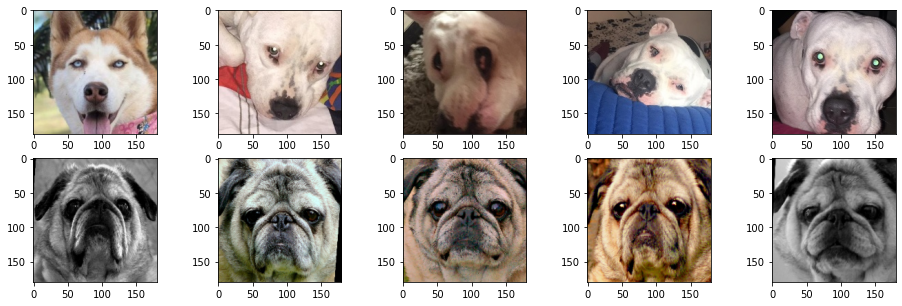

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Numero de componentes principales
k = 50

#Reconstrucción de imagenes originales por medio de eigenfaces aplicando PCA
faces_pca = PCA(n_components=k)
faces_pca.fit(matriz_imagenes)
components = faces_pca.transform(matriz_imagenes)
projected = faces_pca.inverse_transform(components)

#Exportacion de eigenfaces a carpeta
for i,img in enumerate(projected):
  #Guarda imagenes imagenes con cuadros
  os.makedirs(path_resultado+ '/'+ path_files[i], exist_ok=True)
  filename=(path_resultado + '/' + path_files[i] + '/' + files[i]) 
  cv2.imwrite(filename, projected[i].reshape(180,180)) 


#-------------------------
#Images de los eigenfaces 
fig, axes = plt.subplots(2,5,figsize=(16,5))

for i, ax in enumerate(axes.flat):
  ax.imshow(projected[i].reshape(180,180),cmap="gray")
  eigen = []



#-------------------------
#Imagenes Originales
fig, axes = plt.subplots(2,5,figsize=(16,5))

lista=[]
#Recorrer todas las imagenes
for i in path_database:
#for i in (files):
  imgBGR = cv2.imread(i)
  imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
  lista.append(imgRGB)

#Imprimir todas las imagenes
for i, ax in enumerate(axes.flat):
  ax.imshow(lista[i], cmap="gray")





